# Dataset: Breast cancer risk estimation for Cuban women

<a id='Dataset'></a>

Our data is from BCSC Hispanic dataset
We shall be examining medical data of 1,697 cases of breast cancer diagnosis in Cuban women.



<a id='gathering'></a>

## Gathering Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/uginm102/MCSC-MUK/main/MCS7103-MachineLearning/CubanDataset.csv')


<a id='assessing'></a>

## Assessing Data

The patients data records are stored in one table called `data`.

The data is collected from patients who have gone for breat cancer screening.

The table is displayed bellow.

In [ ]:
# Display data
data


,id,age,menarche,menopause,agefirst,children,breastfeeding,nrelbc,biopsies,hyperplasia,...,weight,exercise,alcohol,tobacco,allergies,emotional,depressive,histologicalclass,birads,cancer
0,1,50,11,No,No,0,No,Mother,1.0,Yes,...,83.4,No,Yes,Yes,Rhinitis,Sad,Yes,3.0,3A,Yes
1,2,46,12,No,36,1,3 months,Mother/Sister,2.0,Yes,...,78.2,2,Yes,No,Medicines,Joy,No,3.0,3B,Yes
2,3,47,13,No,26,1,3 months,Sister,1.0,Yes,...,82.6,1,No,Yes,Laryngitis,Sad,No,4.0,3B,Yes
3,4,49,11,47,21,1,No,Daughter,1.0,No,...,79.4,No,Yes,Yes,No,Joy,No,3.0,4B,Yes
4,5,54,14,42,16,1,1 month,Mother,2.0,Yes,...,81.5,No,Yes,No,No,Sad,Yes,4.0,3C,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,1693,42,12,32,20,2,3,No,0.0,No,...,60.0,0,Yes,No,Other,Joy,No,NaN,NaN,No
1693,1694,21,12,0,0,0,0,No,0.0,No,...,70.0,0,No,No,NaN,Joy,No,NaN,NaN,No
1694,1695,21,9,0,0,0,0,No,0.0,No,...,55.0,3,Yes,Yes,Other,Joy,No,NaN,NaN,No
1695,1696,25,12,0,0,0,0,No,0.0,No,...,69.0,5,Yes,Yes,Other,Joy,No,NaN,NaN,No


`data` columns

**Risk factor**:	Description	- Data type	(Values)

1. **age**:	Patient's age	- Quantitative ( 20 - 90)
2. **menarche**:	Age of menarche	- Quantitative ( 8 - 17)
3. **menopause**:	Age of menopause - Quantitative ( 0, 30 - 60)
4. **agefirst**:	Age at first successful delivery - Quantitative ( 0, 9 - 46)
5. **children**:	Number of children born alive -  ( 0 - 6)
6. **breastfeeding**:	Time breastfed in months - Quantitative ( 0 - 72(months))
7. **nrelbc**: Number of first-degree relatives with breast cancer - Quantitative ( 0 - 2)
8. **biopsies**: Number of breast biopsies - Quantitative ( 0 - 5)
9. **hyperplasia**:	Atypical hyperplasia - Qualitative ( no, yes)
10. **race**:	Race - Quantitative ( white, mixed, black)
11. **year**:
12. **imc**:
13. **weight**: Patients weight at screening - Quantitative - Kgs
14. **exercise**:	Weekly physical activity - Quantitative ( 0 - 7)
15. **alcohol**:	Alcohol consumption - Qualitative ( no, yes)
16. **tobacco**:	Tobacco consumption - Qualitative ( no, yes)
17. **allergies**:	Number of allergies suffered - Qualitative ( no, dermatitis, laryngitis,	medications, other)
18. **emotional**:
19. **depressive**: Whether a patient is depressed or not - Qaulitative (yes, no)
20. **histologicalclass**:
21. **birads**:  Breast Imaging-Reporting and Data System (BI-RADS) (0,1,2,3,4,5,6 broken into A,B and C)
22. **cancer**:	Breast cancer diagnosis - Qualitative ( no, yes)

Check dimension of the dataset, missing values and data type.


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1697 non-null   int64  
 1   age                1697 non-null   int64  
 2   menarche           1697 non-null   int64  
 3   menopause          1697 non-null   object 
 4   agefirst           1697 non-null   object 
 5   children           1697 non-null   object 
 6   breastfeeding      1697 non-null   object 
 7   nrelbc             1697 non-null   object 
 8   biopsies           1696 non-null   float64
 9   hyperplasia        1697 non-null   object 
 10  race               1697 non-null   object 
 11  year               1160 non-null   float64
 12  imc                1690 non-null   float64
 13  weight             1687 non-null   float64
 14  exercise           1697 non-null   object 
 15  alcohol            1697 non-null   object 
 16  tobacco            1697 

Check data types


In [ ]:
print(data.dtypes)

id                     int64
age                    int64
menarche               int64
menopause             object
agefirst              object
children              object
breastfeeding         object
nrelbc                object
biopsies             float64
hyperplasia           object
race                  object
year                 float64
imc                  float64
weight               float64
exercise              object
alcohol               object
tobacco               object
allergies             object
emotional             object
depressive            object
histologicalclass    float64
birads                object
cancer                object
dtype: object


## We next do data wrangling to clean our data and have it ready for our analysis

In [ ]:
# Check for duplicates
print(f"Duplicates found: {data.duplicated().sum()}")

Duplicates found: 0


Check if the column is unique

In [ ]:
print('unique column values')
data.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)

unique column values


,0
id,1697
weight,293
imc,189
age,61
breastfeeding,42
agefirst,33
menopause,29
allergies,25
year,19
nrelbc,18


Only Id column is unique

Analyse the data to find how many cases were positive and negative.


In [ ]:
# Total Cases
print(f"Total Cases: {len(data)}")

# Total positives
print(f"Total Positives: {len(data[data['cancer'] == 'Yes'])}")


# Total negatives
print(f"Total Negatives: {len(data[data['cancer'] == 'No'])}")

Total Cases: 1697
Total Positives: 1160
Total Negatives: 537


Missing value analysis.

biopsies               1
year                 537
imc                    7
weight                10
allergies            276
histologicalclass    537
birads               537
dtype: int64


Text(0, 0.5, 'Features')

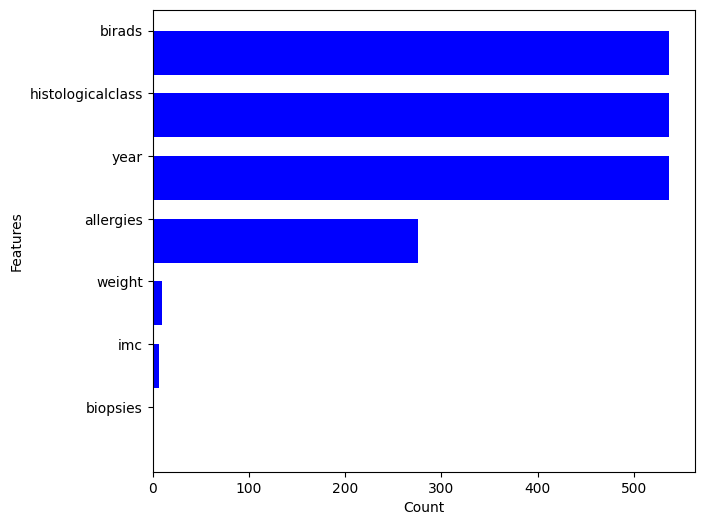

In [ ]:
#cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
cols_with_missing = data.isnull().sum()

cols_with_missing = cols_with_missing[cols_with_missing>0]

print(cols_with_missing)

cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))
width = 0.70 # the width of the bars
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features')

We have 537 cases where patients didn't have cancer.

Which corresponds with the value for year of diagnosis, histological class and birads.

These columns therefore won't be needed in our data analysis.

Id is also not needed in our predictions.

Emotional, Allergies and Depressive is also irrelevant in our analysis.

It is clear that biopsies will not help in our analysis as they are not done for those who didn't get diagnosed with breast cancer.

Remove unneeded columns.

In [ ]:
clean_data = data.drop(['histologicalclass','birads','year','id','emotional','depressive','allergies','biopsies'], axis=1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1697 non-null   int64  
 1   menarche       1697 non-null   int64  
 2   menopause      1697 non-null   object 
 3   agefirst       1697 non-null   object 
 4   children       1697 non-null   object 
 5   breastfeeding  1697 non-null   object 
 6   nrelbc         1697 non-null   object 
 7   hyperplasia    1697 non-null   object 
 8   race           1697 non-null   object 
 9   imc            1690 non-null   float64
 10  weight         1687 non-null   float64
 11  exercise       1697 non-null   object 
 12  alcohol        1697 non-null   object 
 13  tobacco        1697 non-null   object 
 14  cancer         1697 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 199.0+ KB


Check duplicate records

In [ ]:
# calculate duplicates
dups = clean_data.duplicated()
print(dups)
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(clean_data[dups])

0       False
1       False
2       False
3       False
4       False
        ...  
1692    False
1693    False
1694    False
1695    False
1696    False
Length: 1697, dtype: bool
True
      age  menarche menopause agefirst children breastfeeding nrelbc  \
125    41        12        No       24        0            No     No   
1385   32        13         0       25        2             3     No   

     hyperplasia   race   imc  weight exercise alcohol tobacco cancer  
125           No  Mixed  26.8    79.6       No     Yes     Yes    Yes  
1385          No  White  27.2    74.0        0      No      No     No  


All data must be numeric.

Label Encoding the Target Variable

Variables with a binary choice of yes and no should be encoded with 1 or 0 respectively.

In [ ]:
# Instantiate the LabelEncoder
le = LabelEncoder()

clean_data['cancer'] = le.fit_transform(clean_data['cancer'])
# Print cancer mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f'cancer mapping: {mapping}')

clean_data['hyperplasia'] = le.fit_transform(clean_data['hyperplasia'])
# Print hyperplasia mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f'hyperplasia mapping: {mapping}')

clean_data['alcohol'] = le.fit_transform(clean_data['alcohol'])
# Print alcohol mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f'alcohol mapping: {mapping}')

clean_data['tobacco'] = le.fit_transform(clean_data['tobacco'])
# Print tobacco mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f'tobacco mapping: {mapping}')

clean_data['race'] = le.fit_transform(clean_data['race'])
# Print race mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f'race mapping: {mapping}')


clean_data.info()

cancer mapping: {'No': 0, 'Yes': 1}
hyperplasia mapping: {'No': 0, 'Yes': 1}
alcohol mapping: {'No': 0, 'Yes': 1}
tobacco mapping: {'No': 0, 'Yes': 1}
race mapping: {'Black': 0, 'Mixed': 1, 'White': 2}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1697 non-null   int64  
 1   menarche       1697 non-null   int64  
 2   menopause      1697 non-null   object 
 3   agefirst       1697 non-null   object 
 4   children       1697 non-null   object 
 5   breastfeeding  1697 non-null   object 
 6   nrelbc         1697 non-null   object 
 7   hyperplasia    1697 non-null   int64  
 8   race           1697 non-null   int64  
 9   imc            1690 non-null   float64
 10  weight         1687 non-null   float64
 11  exercise       1697 non-null   object 
 12  alcohol        1697 non-null   int64  
 13  tobacco        1697 non-nu

Cleaning menopause, where it says no replace with 0


In [ ]:
print(clean_data['menopause'].head(10))
print('\n')
clean_data['menopause'] = clean_data['menopause'].where(~clean_data['menopause'].isin(['No']), 0)
print(clean_data['menopause'].head(10))


0    No
1    No
2    No
3    47
4    42
5    44
6    46
7    44
8    No
9    No
Name: menopause, dtype: object


0     0
1     0
2     0
3    47
4    42
5    44
6    46
7    44
8     0
9     0
Name: menopause, dtype: object


Cleaning exercise, where it says no replace with 0.

This works for us as exercise is the number of days in a week, so 0 is as good as No.


In [ ]:
print(clean_data['exercise'].head(10))
print('\n')
clean_data['exercise'] = clean_data['exercise'].where(~clean_data['exercise'].isin(['No']), 0)
print(clean_data['exercise'].head(10))

0       No
1        2
2        1
3       No
4       No
5       No
6       No
7       No
8       No
9    Diary
Name: exercise, dtype: object


0        0
1        2
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9    Diary
Name: exercise, dtype: object


Cleaning children, where it says 5+ replace with 6.


In [ ]:
print(clean_data['children'].head(10))
print('\n')
clean_data['children'] = clean_data['children'].where(~clean_data['children'].isin(['5+']), 6)
print(clean_data['children'].head(10))

0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    0
Name: children, dtype: object


0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    0
Name: children, dtype: object


Cleaning agefirst, where it says no replace with 0.

This can be missleading as the patient doesn't have a child at 0, but it can be treated as a special case.

In [ ]:
print(clean_data['agefirst'].head(10))
print('\n')
clean_data['agefirst'] = clean_data['agefirst'].where(~clean_data['agefirst'].isin(['No']), 0)
print(clean_data['agefirst'].head(10))

0    No
1    36
2    26
3    21
4    16
5    26
6    21
7    20
8    27
9    24
Name: agefirst, dtype: object


0     0
1    36
2    26
3    21
4    16
5    26
6    21
7    20
8    27
9    24
Name: agefirst, dtype: object


Cleaning exercise, where it says Dairy replace with 7.

Where it says No, change to 0;

This means that someone exercises all days of the week.

> Add blockquote




In [ ]:
print(clean_data['exercise'].head(10))
print('\n')
clean_data['exercise'] = clean_data['exercise'].where(~clean_data['exercise'].isin(['Diary']), 7)
clean_data['exercise'] = clean_data['exercise'].where(~clean_data['exercise'].isin(['NO']), 0)
print(clean_data['exercise'].head(10))

0        0
1        2
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9    Diary
Name: exercise, dtype: object


0    0
1    2
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    7
Name: exercise, dtype: object


Cleaning breastfeeding, where it says No replace with 0.

It is measured in months and 0 months should work fine.

Also, strip out the months part so we remain with only numeric values.


In [ ]:
# Function to apply
def only_take_first_digit(data): # patient refers to df to which the function is applied
    if(type(data['breastfeeding']) == str):
      return data['breastfeeding'].split()[0]
    else:
      return data['breastfeeding']

print(clean_data['breastfeeding'].head(10))
print('\n')
clean_data['breastfeeding'] = clean_data.apply(only_take_first_digit, axis=1)
clean_data['breastfeeding'] = clean_data['breastfeeding'].where(~clean_data['breastfeeding'].isin(['No']), 0)



print(clean_data['breastfeeding'].head(10))

0          No
1    3 months
2    3 months
3          No
4     1 month
5          No
6    2 months
7     1 month
8     1 month
9          No
Name: breastfeeding, dtype: object


0    0
1    3
2    3
3    0
4    1
5    0
6    2
7    1
8    1
9    0
Name: breastfeeding, dtype: object


Cleaning nrelbc (Number of first-degree relatives with breast cancer).

We can see that the data in this column is split by a forward slash, therefore each time we encounter this we count another family member.


In [ ]:
# Function to apply
def count_relatives(data): # patient refers to df to which the function is applied
    if(type(data['nrelbc']) == str):
      return len(data['nrelbc'].split('/'))
    else:
      return 0

print(clean_data['nrelbc'].head(10))
print('\n')
clean_data['nrelbc'] = clean_data.apply(count_relatives, axis=1)

print(clean_data['nrelbc'].head(10))

0           Mother
1    Mother/Sister
2           Sister
3         Daughter
4           Mother
5               No
6           Mother
7    Mother/Sister
8           Mother
9               No
Name: nrelbc, dtype: object


0    1
1    2
2    1
3    1
4    1
5    1
6    1
7    2
8    1
9    1
Name: nrelbc, dtype: int64


Feature and Target Separation

We now separate the features (independent variables) from the target (dependent variable).

In [ ]:
X = clean_data.drop(['cancer'], axis=1)
Y = clean_data['cancer']

In [ ]:
clean_data.head(20)


,age,menarche,menopause,agefirst,children,breastfeeding,nrelbc,hyperplasia,race,imc,weight,exercise,alcohol,tobacco,cancer
0,50,11,0,0,0,0,1,1,2,27.6,83.4,0,1,1,1
1,46,12,0,36,1,3,2,1,1,27.3,78.2,2,1,0,1
2,47,13,0,26,1,3,1,1,0,24.6,82.6,1,0,1,1
3,49,11,47,21,1,0,1,0,0,28.6,79.4,0,1,1,1
4,54,14,42,16,1,1,1,1,2,28.4,81.5,0,1,0,1
5,53,11,44,26,1,0,1,0,2,24.0,75.0,0,1,0,1
6,56,11,46,21,1,2,1,0,2,25.1,59.4,0,1,1,1
7,48,13,44,20,1,1,2,0,2,26.4,79.3,0,1,0,1
8,42,11,0,27,1,1,1,1,2,22.3,68.1,0,1,1,1
9,41,12,0,24,0,0,1,1,2,26.8,82.4,7,1,1,1


In [ ]:
clean_data.describe()

,age,menarche,nrelbc,hyperplasia,race,imc,weight,alcohol,tobacco,cancer
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1690.000000,1687.000000,1697.000000,1697.000000,1697.000000
mean,51.483206,11.725987,1.142605,0.461992,1.174425,25.534615,70.497214,0.681791,0.652917,0.683559
std,11.929919,1.839937,0.358102,0.498700,0.804751,4.961554,12.808854,0.465918,0.476183,0.465224
min,20.000000,8.000000,1.000000,0.000000,0.000000,5.000000,13.000000,0.000000,0.000000,0.000000
25%,45.000000,10.000000,1.000000,0.000000,0.000000,22.800000,61.900000,0.000000,0.000000,0.000000
50%,53.000000,12.000000,1.000000,0.000000,1.000000,25.100000,69.200000,1.000000,1.000000,1.000000
75%,61.000000,13.000000,1.000000,1.000000,2.000000,27.300000,79.200000,1.000000,1.000000,1.000000
max,90.000000,17.000000,4.000000,1.000000,2.000000,88.800000,240.000000,1.000000,1.000000,1.000000


## Anaylsis

At this point we have got we've got all our data clean and in a numerical format ready for analysis.

In [ ]:
B, M = Y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

print(clean_data.cancer.size)



Number of Benign:  1160
Number of Malignant :  537
1697


After we have cleaned all our data the next step is to find what variables have a strong correlation to cause cancer.

In [ ]:
print(clean_data['children'])

0       0
1       1
2       1
3       1
4       1
       ..
1692    2
1693    0
1694    0
1695    0
1696    0
Name: children, Length: 1697, dtype: object


In [ ]:
#age	menarche	menopause	agefirst	children	breastfeeding	nrelbc	hyperplasia	race	imc	weight	exercise	alcohol	tobacco
corr = clean_data['cancer'].corr(clean_data['age'])
print(f'Correlation between age and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['menarche'])
print(f'Correlation between menarche and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['menopause'])
print(f'Correlation between menopause and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['agefirst'])
print(f'Correlation between agefirst and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['children'])
print(f'Correlation between children and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['breastfeeding'])
print(f'Correlation between breastfeeding and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['nrelbc'])
print(f'Correlation between nrelbc and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['hyperplasia'])
print(f'Correlation between hyperplasia and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['race'])
print(f'Correlation between race and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['imc'])
print(f'Correlation between imc and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['weight'])
print(f'Correlation between weight and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['exercise'])
print(f'Correlation between exercise and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['alcohol'])
print(f'Correlation between alcohol and having cancer is {round(corr, 2)} \n')

corr = clean_data['cancer'].corr(clean_data['tobacco'])
print(f'Correlation between tobacco and having cancer is {round(corr, 2)} \n')


Correlation between age and having cancer is 0.35 

Correlation between menarche and having cancer is -0.12 

Correlation between menopause and having cancer is 0.29 

Correlation between agefirst and having cancer is -0.17 

Correlation between children and having cancer is -0.43 

Correlation between breastfeeding and having cancer is -0.46 

Correlation between nrelbc and having cancer is 0.2 

Correlation between hyperplasia and having cancer is 0.5 

Correlation between race and having cancer is -0.08 

Correlation between imc and having cancer is -0.15 

Correlation between weight and having cancer is 0.08 

Correlation between exercise and having cancer is 0.03 

Correlation between alcohol and having cancer is 0.57 

Correlation between tobacco and having cancer is 0.54 



From the above results we can see that some fields actually have a negative correlation with getting breast cancer.

A summary of the correlations ranked from highest to lowest.

|Factor| Correlation|
|------|------------|
|alcohol | 0.57 |
|tobacco | 0.54 |
|hyperplasia | 0.5 |
|age | 0.35 |
|menopause | 0.29 |
|nrelbc | 0.2 |
|weight | 0.08 |
|race |-0.08 |
|menarche | -0.12 |
|imc | -0.15 |
|agefirst | -0.17 |
|children | -0.43 |
|breastfeeding | -0.46 |





From our table we can see that drinking alcohol has the highest impact, followed by smoking, hyperplasia, patients age, menopause, nrelbc, and weight.

Race, menarche, imc, agefirst, number of children and breastfeeding don't have a positive correlations.

We can use bar graphs to visualize this.

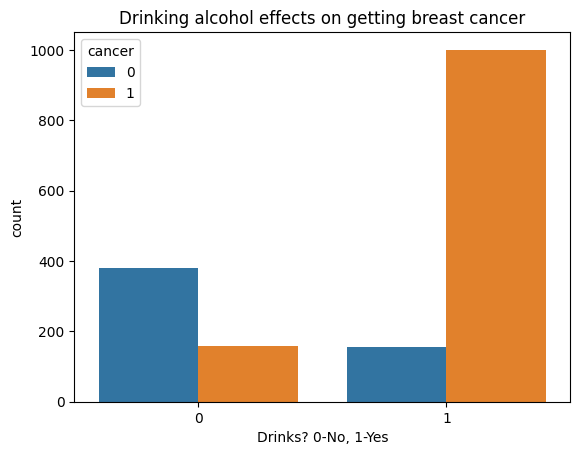

In [ ]:
# Graph To Analyzing the effect of drinking alcohol on getting breast cancer
sns.countplot(data=clean_data, x='alcohol', hue='cancer')
plt.title('Drinking alcohol effects on getting breast cancer')
plt.xlabel("Drinks? 0-No, 1-Yes")
plt.show()


It is clear that people who don't drink have a lower risk of getting breast cancer.

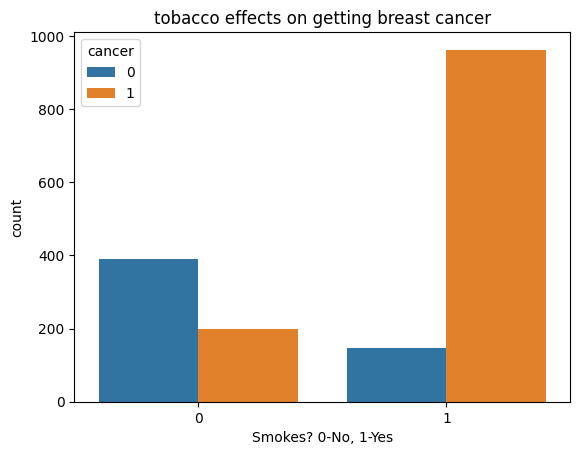

In [ ]:
# Graph To Analyzing the effect of tobacco on getting breast cancer
sns.countplot(data=clean_data, x='tobacco', hue='cancer')
plt.title('tobacco effects on getting breast cancer')
plt.xlabel("Smokes? 0-No, 1-Yes")
plt.show()

It is clear that people who don't smoke have a lower risk of getting breast cancer.

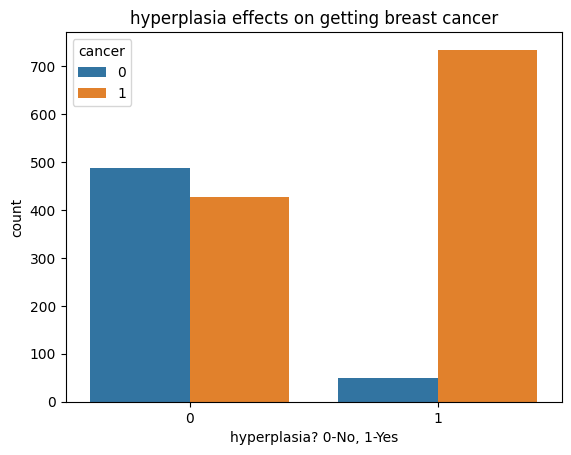

In [ ]:
# Graph To Analyzing the effect of hyperplasia on getting breast cancer
sns.countplot(data=clean_data, x='hyperplasia', hue='cancer')
plt.title('hyperplasia effects on getting breast cancer')
plt.xlabel("hyperplasia? 0-No, 1-Yes")
plt.show()

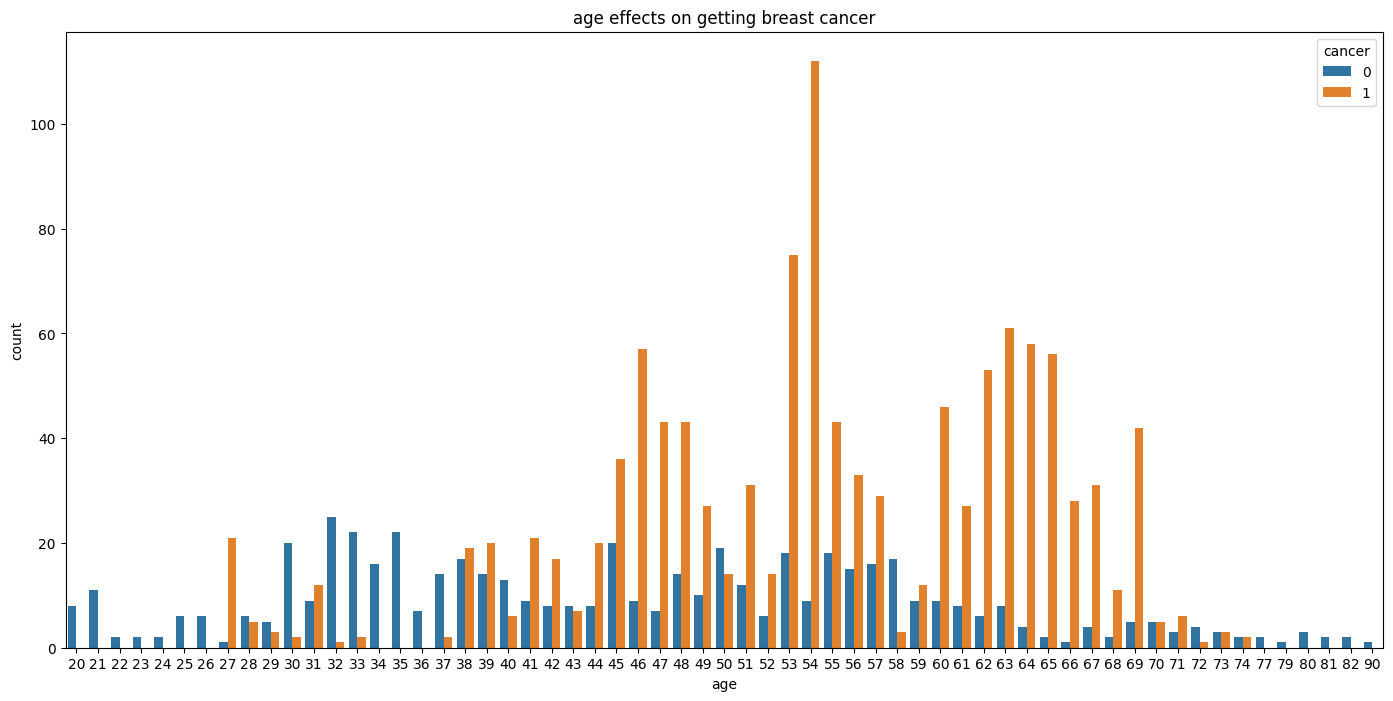

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Graph To Analyzing the effect of age on getting breast cancer
#sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

ax = sns.countplot(data=clean_data, x='age', hue='cancer')
ax.figure.set_size_inches(17, 8)
plt.title('age effects on getting breast cancer')

plt.figure(figsize=(10,6))

plt.show()

Breast cancer seems to be commong among people from the age of 38 to 70, with scattered cases in 20's and even fewer cases above 70.

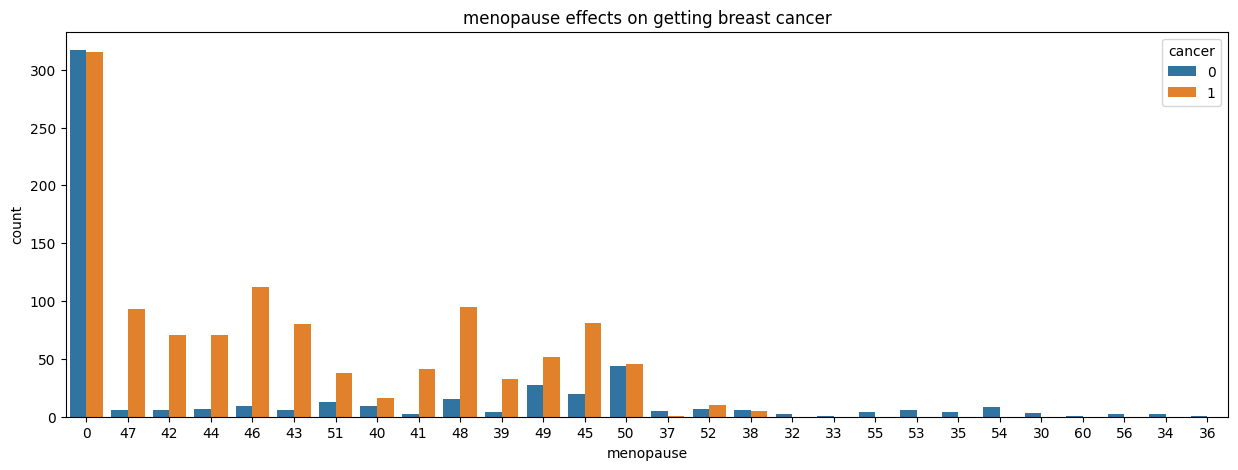

In [ ]:
# Graph To Analyzing the effect of menopause on getting breast cancer
ax = sns.countplot(data=clean_data, x='menopause', hue='cancer')
ax.figure.set_size_inches(15, 5)
plt.title('menopause effects on getting breast cancer')
plt.show()

As from above, it seems like a lot of people get breast cancer before menopause.

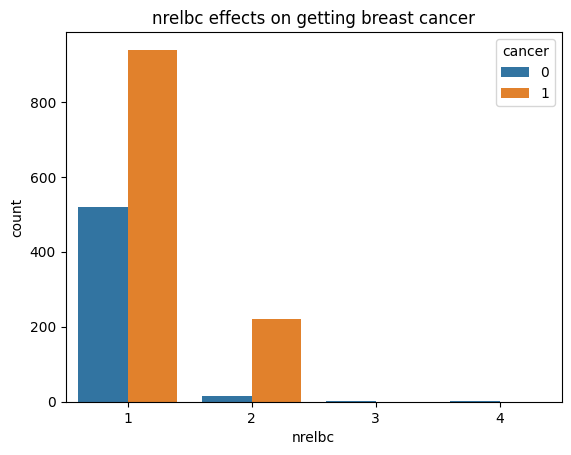

In [ ]:
# Graph To Analyzing the effect of nrelbc on getting breast cancer
sns.countplot(data=clean_data, x='nrelbc', hue='cancer')
plt.title('nrelbc effects on getting breast cancer')
plt.show()

A very interesting output, one would assume that having relatives with breast cancer would increase the risk but that isn't what we are seeing here.

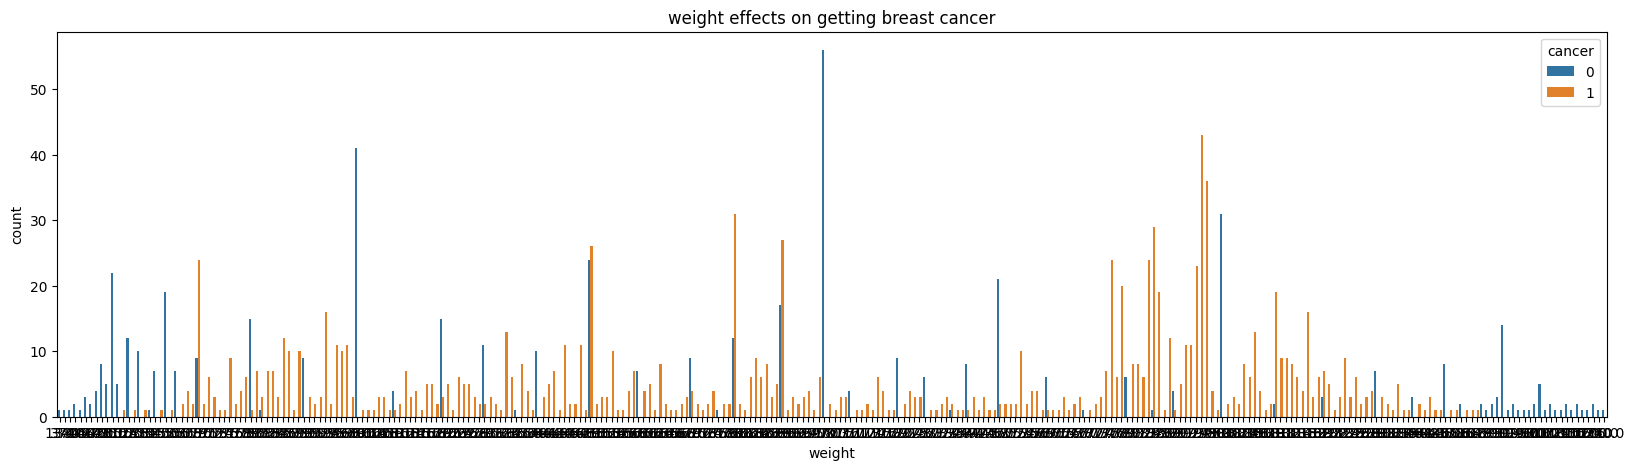

In [ ]:
# Graph To Analyzing the effect of weight on getting breast cancer
ax = sns.countplot(data=clean_data, x='weight', hue='cancer')
ax.figure.set_size_inches(20, 5)
plt.title('weight effects on getting breast cancer')
plt.show()

There doesn't seem to be a clear correlation between weight and breast cancer.

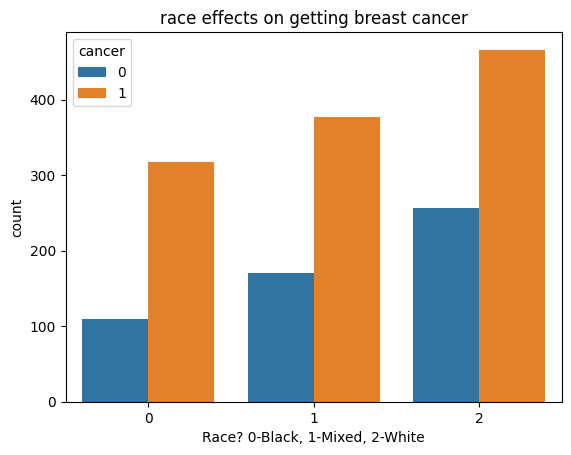

In [ ]:
# Graph To Analyzing the effect of race on getting breast cancer
sns.countplot(data=clean_data, x='race', hue='cancer')
plt.title('race effects on getting breast cancer')
plt.xlabel("Race? 0-Black, 1-Mixed, 2-White")
plt.show()

Althought it appears like breast cancer is more prevelant among white people, the fact that it is common even in other races suggests that this is not a determinant factor.

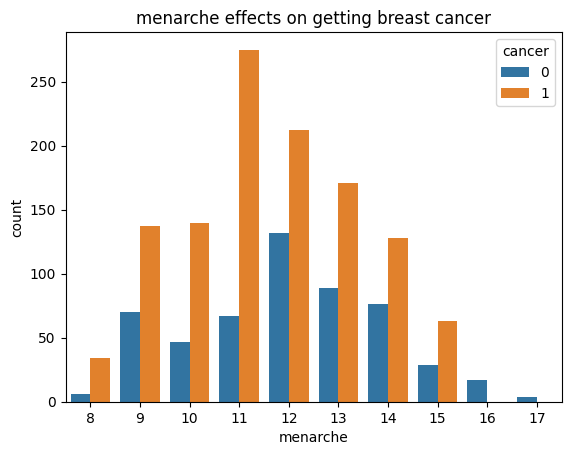

In [ ]:
# Graph To Analyzing the effect of menarche on getting breast cancer
sns.countplot(data=clean_data, x='menarche', hue='cancer')
plt.title('menarche effects on getting breast cancer')
plt.show()

A very interesting view, generally having your periods late seems to be the only time breast cancer is rare. However, there could be other factors at play.

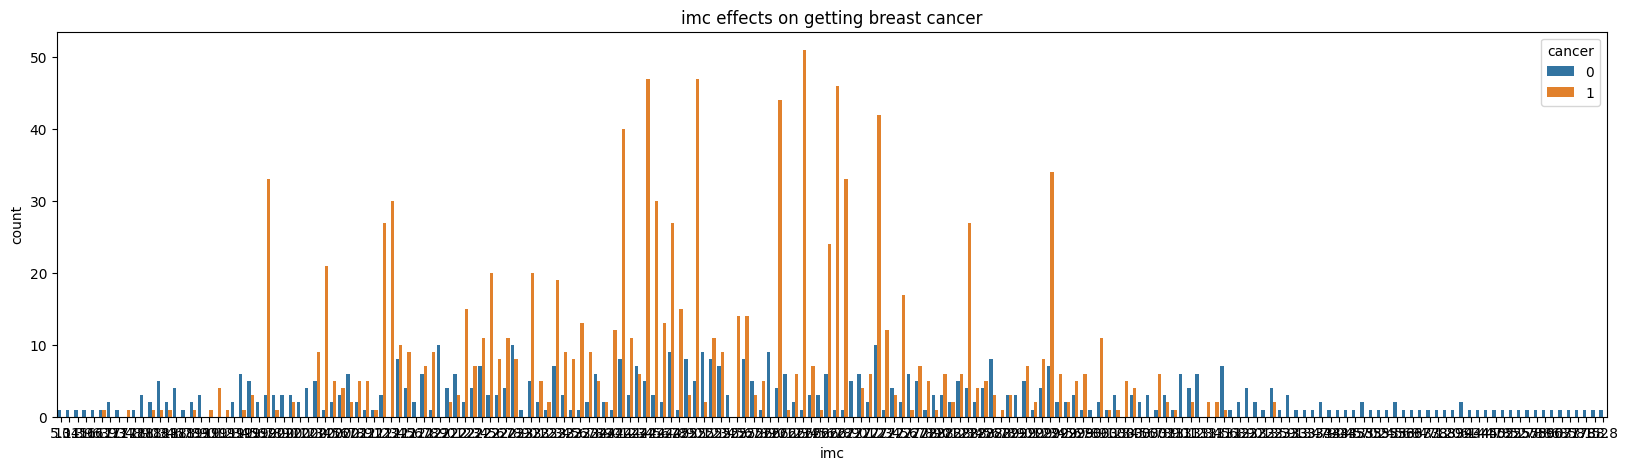

In [ ]:
# Graph To Analyzing the effect of imc on getting breast cancer
ax =sns.countplot(data=clean_data, x='imc', hue='cancer')
ax.figure.set_size_inches(20, 5)
plt.title('imc effects on getting breast cancer')
plt.show()

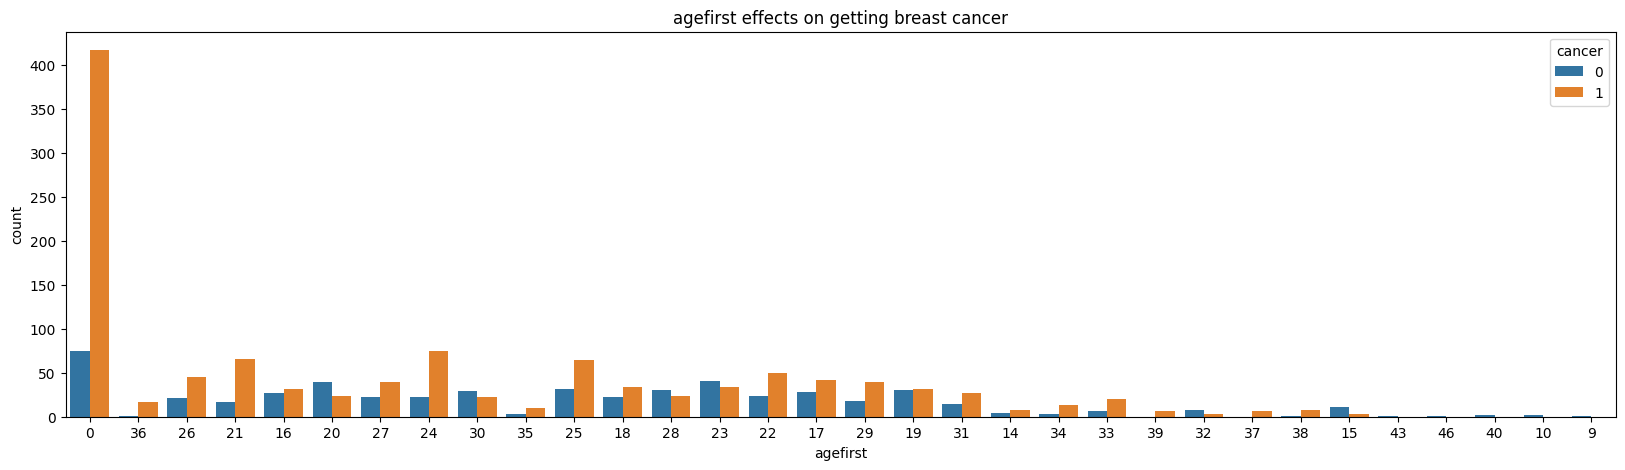

In [ ]:
# Graph To Analyzing the effect of agefirst on getting breast cancer
ax = sns.countplot(data=clean_data, x='agefirst', hue='cancer')
ax.figure.set_size_inches(20, 5)
plt.title('agefirst effects on getting breast cancer')
plt.show()

The age of first delivery doesn't present a strong link with breast cancer. We can see that people without children have a higher value, but that could be missleading.

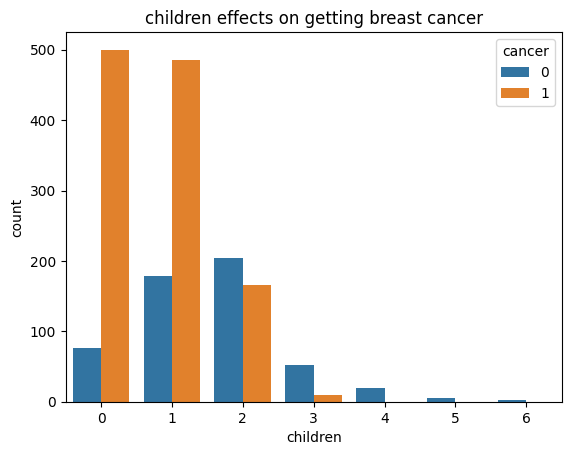

In [ ]:
# Graph To Analyzing the effect of children on getting breast cancer
sns.countplot(data=clean_data, x='children', hue='cancer')
plt.title('children effects on getting breast cancer')
plt.show()

Similar to agefirst, having children doesn't seem to link to breast cancer too.

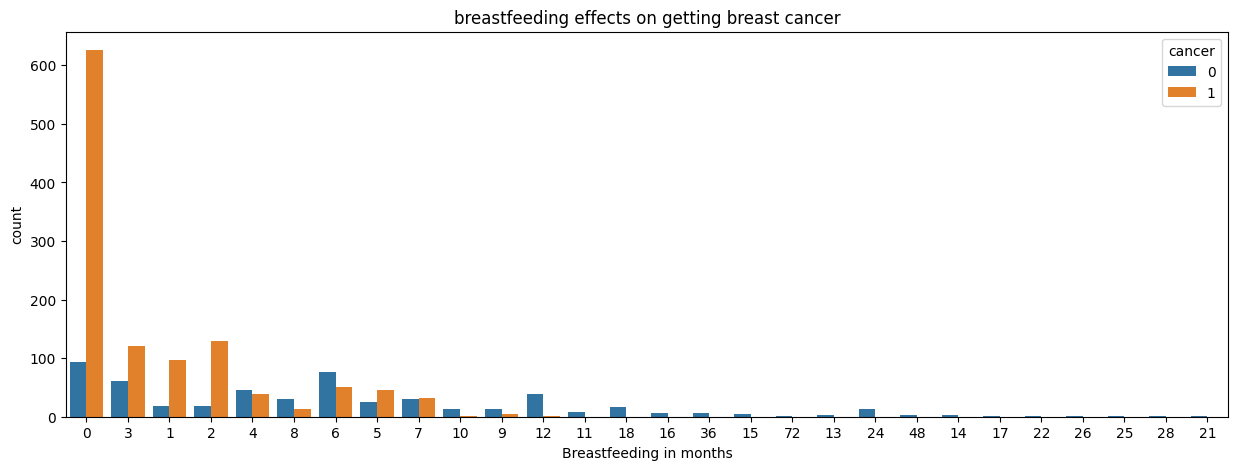

In [ ]:
# Graph To Analyzing the effect of breastfeeding on getting breast cancer
ax = sns.countplot(data=clean_data, x='breastfeeding', hue='cancer')
ax.figure.set_size_inches(15, 5)
plt.title('breastfeeding effects on getting breast cancer')
plt.xlabel("Breastfeeding in months")
plt.show()

It appears that people who have never breast fed get more breast cancer, but this doesn't seem to be a cause.